# Implementing advanced procedures and algorithms in TensorFlow

This notebook collects advanced procedures relevant to training more complex neural networks. It gives you the possibility to look up the procedures as needed and copy the relevant code. The notebook builds on the books by Aurélien Géron and François Chollet.

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os, random
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# 1. From the previous notebook: A multiclass-classification problem

Throughout, we will train a neural network on a dataset of fashion-products that is labeled with the categories of each product. The data is loaded directly from TensorFlow (which has quite the broad collection of datasets):

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_other, y_other), (X_test, y_test) = fashion_mnist.load_data()


In [3]:
print(X_other.shape)
print(y_other.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


The X's are matrices (with 28x28 pixels), while the y's are numbers.
Let's plot two examples:

(-0.5, 27.5, 27.5, -0.5)

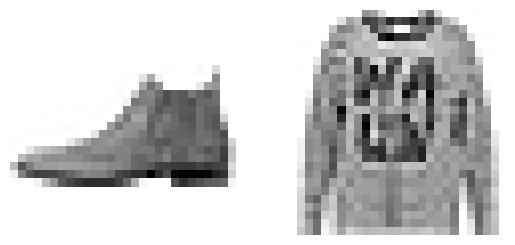

In [4]:
plt.subplot(1, 2, 1)
plt.imshow(X_test[0], cmap="binary")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(X_test[500], cmap="binary")
plt.axis("off")

As well as the corresponding labels:

In [5]:
print(y_test[0])
print(y_test[500])


9
2


That's a bit hard to interpret. Luckily, we have the right names for each label available:

In [6]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

We can now take another look at what the pictures above represent:

In [7]:
print(class_names[y_test[0]])
print(class_names[y_test[500]])


Ankle boot
Pullover


Finally, we divide the values of X by 255 (essentially standardizing the pixel-values to 0-1) and also split apart a validation set (of the same size as the test set):

In [8]:
X_other = X_other / 255.0
X_test = X_test / 255.0
X_train, X_valid, y_train, y_valid = train_test_split(
    X_other, y_other, train_size=50000, random_state=152
)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)


# 2. Help! My model won't train

Sometimes models just won't train, or they only achieve very bad performance. Don't worry, luckily we can always train *some* model, because we can even learn from random data (now, whether this is desirable is another question). Let's see what could be the issue with training our model:

In [9]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-27 13:59:30.556387: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-27 13:59:30.556597: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Use the `summary` function, to see whether everything worked out as it should. If we defined the model as discussed above, we should get a total of 407,050 parameters.

In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


We can now compile the model. We use `optimizer=tf.keras.optimizers.experimental.SGD(learning_rate=1.0)` and `metrics=['accuracy']`. For the loss, we use `sparse_categorical_crossentropy`. This is because our y's here are **not** one-hot-encoded, but instead are values from 0 to 9.

In [11]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
    metrics=["accuracy"],
)

Train the model for 15 epochs, keeping track also of the `validation_data`.

In [12]:
log = model.fit(
    X_train, y_train, epochs=10, batch_size=128, validation_data=(X_valid, y_valid)
)

Epoch 1/10


2023-03-27 13:59:38.114001: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-27 13:59:38.270236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 2.2876 - accuracy: 0.2547

2023-03-27 13:59:40.865387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 3s 7ms/step - loss: 2.2876 - accuracy: 0.2547 - val_loss: 1.5909 - val_accuracy: 0.3388
Epoch 2/10
391/391 [==============================] - 3s 7ms/step - loss: 1.8938 - accuracy: 0.2807 - val_loss: 1.5809 - val_accuracy: 0.3679
Epoch 3/10
391/391 [==============================] - 3s 7ms/step - loss: 2.0414 - accuracy: 0.2203 - val_loss: 2.2578 - val_accuracy: 0.1174
Epoch 4/10
391/391 [==============================] - 3s 8ms/step - loss: 2.0115 - accuracy: 0.2188 - val_loss: 1.5512 - val_accuracy: 0.3593
Epoch 5/10
391/391 [==============================] - 3s 7ms/step - loss: 2.1257 - accuracy: 0.1879 - val_loss: 2.0836 - val_accuracy: 0.1185
Epoch 6/10
391/391 [==============================] - 3s 7ms/step - loss: 2.1277 - accuracy: 0.1745 - val_loss: 2.0180 - val_accuracy: 0.2053
Epoch 7/10
391/391 [==============================] - 3s 7ms/step - loss: 2.1844 - accuracy: 0.1502 - val_loss: 2.3040 - val_accuracy: 0.1153
Epoch 8/10
391/39

Take a look at the training process:

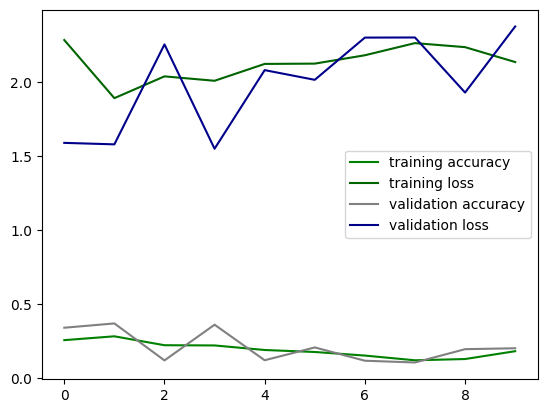

In [13]:
def create_plot(log):
    plt.plot(log.history["accuracy"], label="training accuracy", color="green")
    plt.plot(log.history["loss"], label="training loss", color="darkgreen")
    plt.plot(log.history["val_accuracy"], label="validation accuracy", color="grey")
    plt.plot(log.history["val_loss"], label="validation loss", color="darkblue")
    plt.legend()
    plt.show()


create_plot(log)

Of course, we are not making great predictions with our model:

1/1 [==============================] - 0s 55ms/step
Predictions are: ['Sandal', 'Pullover', 'Pullover', 'Pullover']


2023-03-27 14:00:05.693307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


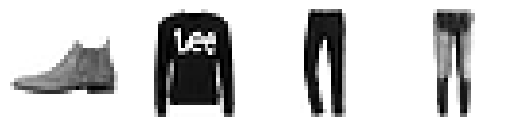

In [14]:
X_new = X_test[:4]
y_predict = np.argmax(model.predict(X_new), axis=-1)
y_predict = [class_names[y] for y in y_predict]
plt.subplot(1, 4, 1)
plt.imshow(X_test[0], cmap="binary")
plt.axis("off")
plt.subplot(1, 4, 2)
plt.imshow(X_test[1], cmap="binary")
plt.axis("off")
plt.subplot(1, 4, 3)
plt.imshow(X_test[2], cmap="binary")
plt.axis("off")
plt.subplot(1, 4, 4)
plt.imshow(X_test[3], cmap="binary")
plt.axis("off")
print("Predictions are: " + str(y_predict))

Let's try this again, by lowering our learning rate:

Epoch 1/20
 14/391 [>.............................] - ETA: 3s - loss: 2.0620 - accuracy: 0.3549

2023-02-23 09:37:30.776902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 1.0326 - accuracy: 0.6914

2023-02-23 09:37:33.870223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 4s 9ms/step - loss: 1.0326 - accuracy: 0.6914 - val_loss: 0.7517 - val_accuracy: 0.7572
Epoch 2/20
391/391 [==============================] - 3s 7ms/step - loss: 0.6768 - accuracy: 0.7846 - val_loss: 0.6391 - val_accuracy: 0.7906
Epoch 3/20
391/391 [==============================] - 3s 7ms/step - loss: 0.5967 - accuracy: 0.8097 - val_loss: 0.5848 - val_accuracy: 0.8048
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 0.5538 - accuracy: 0.8199 - val_loss: 0.5566 - val_accuracy: 0.8090
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 0.5262 - accuracy: 0.8271 - val_loss: 0.5336 - val_accuracy: 0.8183
Epoch 6/20
391/391 [==============================] - 3s 7ms/step - loss: 0.5056 - accuracy: 0.8322 - val_loss: 0.5126 - val_accuracy: 0.8251
Epoch 7/20
391/391 [==============================] - 3s 7ms/step - loss: 0.4903 - accuracy: 0.8358 - val_loss: 0.5081 - val_accuracy: 0.8272
Epoch 8/20
391/39

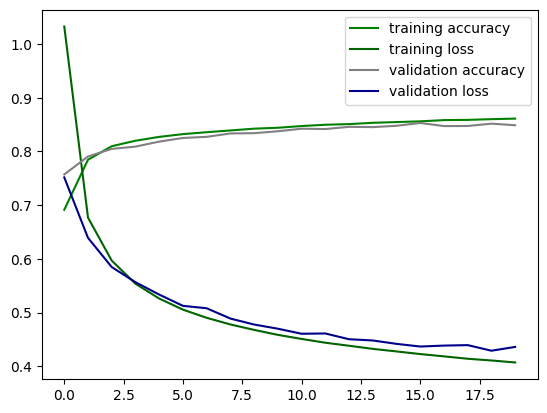

In [32]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)
log = model.fit(
    X_train, y_train, epochs=20, batch_size=128, validation_data=(X_valid, y_valid)
)
create_plot(log)

Looking much better, right? Our predictions also make somewhat more sense:

1/1 [==============================] - 0s 33ms/step
Predictions are: ['Ankle boot', 'Pullover', 'Trouser', 'Trouser']


2023-02-23 09:20:52.287058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


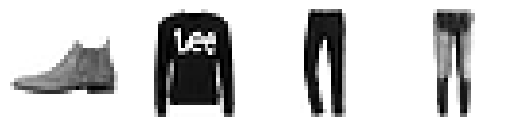

In [21]:
X_new = X_test[:4]
y_predict = np.argmax(model.predict(X_new), axis=-1)
y_predict = [class_names[y] for y in y_predict]
plt.subplot(1, 4, 1)
plt.imshow(X_test[0], cmap="binary")
plt.axis("off")
plt.subplot(1, 4, 2)
plt.imshow(X_test[1], cmap="binary")
plt.axis("off")
plt.subplot(1, 4, 3)
plt.imshow(X_test[2], cmap="binary")
plt.axis("off")
plt.subplot(1, 4, 4)
plt.imshow(X_test[3], cmap="binary")
plt.axis("off")
print("Predictions are: " + str(y_predict))

## 2.1 Other changes that may be useful

### Defining the batch size

You might not have noticed, but we run mini-batch gradient descent by default. We can control the batch-size within the `model.fit` function. The default is `32`. Run the below code:

In [23]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)
log = model.fit(
    X_train, y_train, epochs=2, batch_size=8, validation_data=(X_valid, y_valid)
)

Epoch 1/2
  21/6250 [..............................] - ETA: 32s - loss: 2.0746 - accuracy: 0.3155 

2023-02-23 09:21:06.262782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6242/6250 [============================>.] - ETA: 0s - loss: 0.5756 - accuracy: 0.8052

2023-02-23 09:21:37.034123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6250/6250 [==============================] - 35s 6ms/step - loss: 0.5755 - accuracy: 0.8052 - val_loss: 0.4716 - val_accuracy: 0.8367
Epoch 2/2
6250/6250 [==============================] - 34s 5ms/step - loss: 0.4320 - accuracy: 0.8492 - val_loss: 0.4149 - val_accuracy: 0.8553


Can you remake the model, but change the `batch_size` to `256`?

In [34]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)
log = model.fit(
    X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid)
)

Epoch 1/10
  16/1563 [..............................] - ETA: 10s - loss: 2.0935 - accuracy: 0.2422

2023-02-23 09:39:39.696424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.7319 - accuracy: 0.7654

2023-02-23 09:39:49.320725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 11s 7ms/step - loss: 0.7319 - accuracy: 0.7654 - val_loss: 0.5671 - val_accuracy: 0.8084
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5123 - accuracy: 0.8278 - val_loss: 0.5000 - val_accuracy: 0.8293
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4671 - accuracy: 0.8413 - val_loss: 0.4777 - val_accuracy: 0.8317
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4414 - accuracy: 0.8479 - val_loss: 0.4489 - val_accuracy: 0.8421
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4232 - accuracy: 0.8541 - val_loss: 0.4549 - val_accuracy: 0.8382
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4093 - accuracy: 0.8596 - val_loss: 0.4212 - val_accuracy: 0.8532
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3983 - accuracy: 0.8626 - val_loss: 0.4011 - val_accuracy: 0.86

Notice the number of steps taken in each epoch (the counter just underneath "Epoch x/30"). Can you explain where the number of steps are coming from? What do you notice about the time taken?

### Using Momentum

We can add momentum to many algorithms. The base case is to add momentum to `SGD`. A typical value is `0.9` but keep in mind that this is another hyperparameter that may need some tuning. When setting up `SGD`, you can also tick `nesterov=True` to use the Nesterov algorithm, a moment-based algorithm we didn't discuss. Try it out:

Epoch 1/5
 15/391 [>.............................] - ETA: 2s - loss: 1.7818 - accuracy: 0.4240

2023-02-23 09:41:30.259286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 0.6399 - accuracy: 0.7838

2023-02-23 09:41:32.931011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 3s 8ms/step - loss: 0.6399 - accuracy: 0.7838 - val_loss: 0.4840 - val_accuracy: 0.8327
Epoch 2/5
391/391 [==============================] - 3s 7ms/step - loss: 0.4546 - accuracy: 0.8444 - val_loss: 0.4325 - val_accuracy: 0.8508
Epoch 3/5
391/391 [==============================] - 3s 8ms/step - loss: 0.4111 - accuracy: 0.8578 - val_loss: 0.4157 - val_accuracy: 0.8545
Epoch 4/5
391/391 [==============================] - 3s 7ms/step - loss: 0.3863 - accuracy: 0.8658 - val_loss: 0.3948 - val_accuracy: 0.8585
Epoch 5/5
391/391 [==============================] - 3s 7ms/step - loss: 0.3716 - accuracy: 0.8701 - val_loss: 0.3895 - val_accuracy: 0.8640


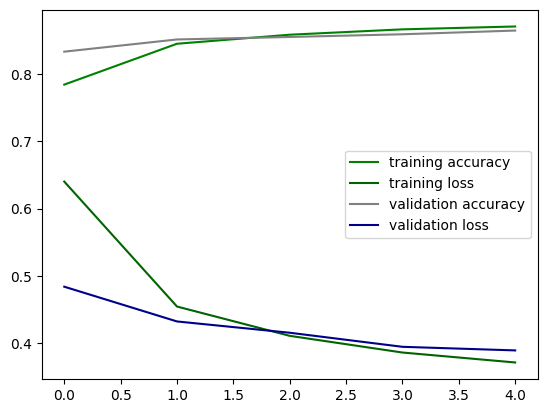

In [35]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=0.01, momentum=0.9, nesterov=False
    ),
    metrics=["accuracy"],
)
log = model.fit(
    X_train, y_train, epochs=5, batch_size=128, validation_data=(X_valid, y_valid)
)
create_plot(log)

### RMSpop

RMSprop is an algorithm that pursues a slightly different idea: it normalizes the gradients using their squares. It requires to specify a `learning_rate`, as well as the hyperparameters `rho` and `epsilon`. For the latter two, the standard values usually do just fine, while even the `learning_rate` is less problematic than in `SGD`.

If you want, you can also add `momentum` to the algorithm.

Try it out:

Epoch 1/3


2023-02-23 09:35:59.533746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 0.5846 - accuracy: 0.7944

2023-02-23 09:36:03.088044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 4s 10ms/step - loss: 0.5846 - accuracy: 0.7944 - val_loss: 0.4310 - val_accuracy: 0.8385
Epoch 2/3
391/391 [==============================] - 3s 8ms/step - loss: 0.3950 - accuracy: 0.8555 - val_loss: 0.3835 - val_accuracy: 0.8548
Epoch 3/3
391/391 [==============================] - 3s 8ms/step - loss: 0.3465 - accuracy: 0.8727 - val_loss: 0.3977 - val_accuracy: 0.8548


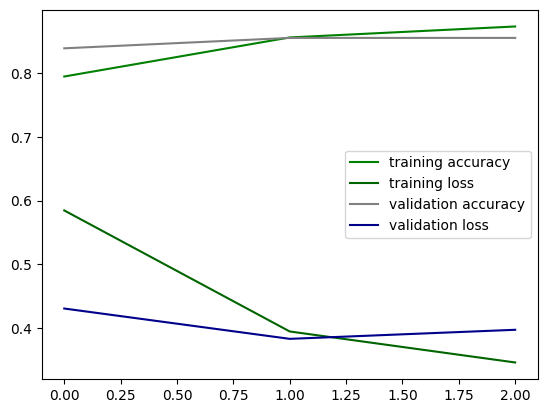

In [31]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(
        learning_rate=0.001, rho=0.9, epsilon=1e-07, momentum=0.0
    ),
    metrics=["accuracy"],
)
log = model.fit(
    X_train, y_train, epochs=3, batch_size=128, validation_data=(X_valid, y_valid)
)
create_plot(log)

### Adam

Finally, we have `Adam`, which is used as commonly (or even more) than `RMSprop`. Adam combines the ideas of RMSprop and momentum gradient descent. However, it also adds a slight adjustment that is particularly relevant for early iterations. The hyperparameters are `learning_rate`, `beta_1`, `beta_2`, and `epislon`, even though mostly people leave everything but the `learning_rate` alone. Try it out:

Epoch 1/3
  1/391 [..............................] - ETA: 1:56 - loss: 2.5621 - accuracy: 0.0781

2023-02-23 09:45:05.569237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 0.5256 - accuracy: 0.8164

2023-02-23 09:45:08.524690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 3s 8ms/step - loss: 0.5256 - accuracy: 0.8164 - val_loss: 0.4503 - val_accuracy: 0.8387
Epoch 2/3
391/391 [==============================] - 3s 7ms/step - loss: 0.3894 - accuracy: 0.8613 - val_loss: 0.3644 - val_accuracy: 0.8709
Epoch 3/3
391/391 [==============================] - 3s 7ms/step - loss: 0.3415 - accuracy: 0.8764 - val_loss: 0.3902 - val_accuracy: 0.8624


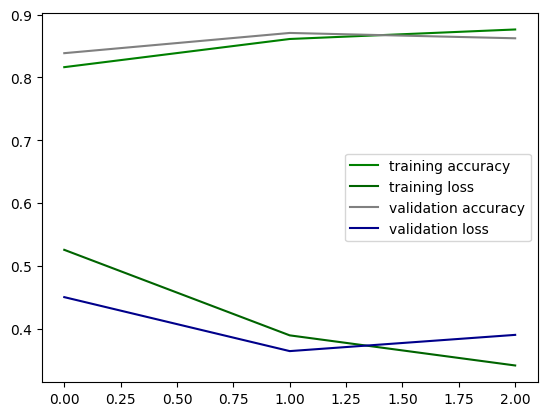

In [41]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07
    ),
    metrics=["accuracy"],
)
log = model.fit(
    X_train, y_train, epochs=3, batch_size=128, validation_data=(X_valid, y_valid)
)
create_plot(log)

### Specific initializations

We generally want to initialize our weights in a sensible manner (especially if we are not using batch normalization, for example, because of runtime concerns). Let's start with our baseline model:

In [42]:
os.environ["PYTHONHASHSEED"] = str(631)
random.seed(631)
np.random.seed(631)
tf.random.set_seed(631)

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

weights, biases = model.layers[1].get_weights()
print("First layer: " + str(weights[0, 0]))
weights, biases = model.layers[-1].get_weights()
print("Last layer: " + str(weights[0, 0]))

First layer: 0.051384553
Last layer: 0.04810781


Can you copy the model definition, but change the first layer to `kernel_initializer='he_normal'` and the output layer to `kernel_initializer='glorot_uniform'`?

What changes do you observe in the first layer, what changes in the last layer? Do they make sense?

In [43]:
os.environ["PYTHONHASHSEED"] = str(631)
random.seed(631)
np.random.seed(631)
tf.random.set_seed(631)

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(512, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(
            10, activation="softmax", kernel_initializer="glorot_uniform"
        ),
    ]
)

weights, biases = model.layers[1].get_weights()
print("First layer: " + str(weights[0, 0]))
weights, biases = model.layers[-1].get_weights()
print("Last layer: " + str(weights[0, 0]))

First layer: -0.022559397
Last layer: 0.04810781


# 3. Enabling and speeding up training

Below, we create a much deeper neural network. As you can see, not much is happening in terms of learning for now:

In [45]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="sigmoid"),
        tf.keras.layers.Dense(30, activation="sigmoid"),
        tf.keras.layers.Dense(30, activation="sigmoid"),
        tf.keras.layers.Dense(30, activation="sigmoid"),
        tf.keras.layers.Dense(30, activation="sigmoid"),
        tf.keras.layers.Dense(30, activation="sigmoid"),
        tf.keras.layers.Dense(30, activation="sigmoid"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)
log = model.fit(
    X_train, y_train, epochs=10, batch_size=128, validation_data=(X_valid, y_valid)
)

Epoch 1/10
  1/391 [..............................] - ETA: 2:09 - loss: 2.4857 - accuracy: 0.1250

2023-02-23 09:45:45.806955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 2.3252 - accuracy: 0.0983

2023-02-23 09:45:49.753426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 5s 11ms/step - loss: 2.3252 - accuracy: 0.0983 - val_loss: 2.3030 - val_accuracy: 0.0986
Epoch 2/10
391/391 [==============================] - 4s 9ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.1034
Epoch 3/10
391/391 [==============================] - 4s 9ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1034
Epoch 4/10
391/391 [==============================] - 4s 9ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3030 - val_accuracy: 0.0977
Epoch 5/10
391/391 [==============================] - 4s 10ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3029 - val_accuracy: 0.0943
Epoch 6/10
391/391 [==============================] - 4s 10ms/step - loss: 2.3028 - accuracy: 0.1005 - val_loss: 2.3030 - val_accuracy: 0.0943
Epoch 7/10
391/391 [==============================] - 4s 10ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3029 - val_accuracy: 0.0987
Epoch 8/10
39

## 3.1 Batch normalization

Batch normalization allows us to do normalization at all stages of the network. For each input that is normalized, we need 4 parameters:
1. One that determines how the input is scaled (trainable)
1. One that determines how the input is shifted (trainable)
1. One that keeps track of the average of that input (non-trainable - it is still being adjusted though!)
1. One that keeps track of the standard deviation of that input (non-trainable - it is still being adjusted though!)

### Option 1: After activation (before inputs are weighted)

We can simply add a `BatchNormalization` layer before each of our `Dense` layers:

In [46]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100, activation="sigmoid"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(30, activation="sigmoid"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(30, activation="sigmoid"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(30, activation="sigmoid"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(30, activation="sigmoid"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(30, activation="sigmoid"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(30, activation="sigmoid"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_56 (Dense)            (None, 100)               78500     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_57 (Dense)            (None, 30)                3030      
                                                                 
 batch_normalization_2 (Batc  (None, 30)             

Can you verify the number of trainable and non-trainable parameters?

Let's now train the network again:

In [51]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)
log = model.fit(
    X_train, y_train, epochs=5, batch_size=128, validation_data=(X_valid, y_valid)
)

Epoch 1/5


2023-02-23 09:51:54.095433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 0.4812 - accuracy: 0.8507

2023-02-23 09:52:05.488734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 13s 29ms/step - loss: 0.4812 - accuracy: 0.8507 - val_loss: 0.4722 - val_accuracy: 0.8490
Epoch 2/5
391/391 [==============================] - 10s 25ms/step - loss: 0.4615 - accuracy: 0.8560 - val_loss: 0.4542 - val_accuracy: 0.8537
Epoch 3/5
391/391 [==============================] - 10s 25ms/step - loss: 0.4476 - accuracy: 0.8571 - val_loss: 0.4517 - val_accuracy: 0.8499
Epoch 4/5
391/391 [==============================] - 10s 25ms/step - loss: 0.4350 - accuracy: 0.8592 - val_loss: 0.4410 - val_accuracy: 0.8534
Epoch 5/5
391/391 [==============================] - 10s 25ms/step - loss: 0.4233 - accuracy: 0.8644 - val_loss: 0.4231 - val_accuracy: 0.8581


We can train even a deep neural network much more easily!

### Option 2: Before activation (after inputs are weighted)

The reommendation by the authors of the original paper on batch normalization is to normalize the weighted sum that goes into the neurons. That is, we first combine the inputs (and add a bias), then we "normalize" that weighted sum, before running the activation function on it. To do so in TensorFlow, we have to split apart our hidden layers into the combination and the activaiton. We out the `BatchNormalization` in-between

In [49]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("sigmoid"),
        tf.keras.layers.Dense(30),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("sigmoid"),
        tf.keras.layers.Dense(30),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("sigmoid"),
        tf.keras.layers.Dense(30),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("sigmoid"),
        tf.keras.layers.Dense(30),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("sigmoid"),
        tf.keras.layers.Dense(30),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("sigmoid"),
        tf.keras.layers.Dense(30),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("sigmoid"),
        tf.keras.layers.Dense(10),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("softmax"),
    ]
)
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_64 (Dense)            (None, 100)               78500     
                                                                 
 batch_normalization_8 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_65 (Dense)            (None, 30)                3030      
                                                                 
 batch_normalization_9 (Batc  (None, 30)               120       
 hNormalization)                                     

In [50]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)
log = model.fit(
    X_train, y_train, epochs=5, batch_size=128, validation_data=(X_valid, y_valid)
)

Epoch 1/5


2023-02-23 09:48:43.423371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 1.0186 - accuracy: 0.7214

2023-02-23 09:48:55.320627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 14s 30ms/step - loss: 1.0186 - accuracy: 0.7214 - val_loss: 1.3428 - val_accuracy: 0.7821
Epoch 2/5
391/391 [==============================] - 10s 25ms/step - loss: 0.6862 - accuracy: 0.8123 - val_loss: 0.6226 - val_accuracy: 0.8245
Epoch 3/5
391/391 [==============================] - 10s 25ms/step - loss: 0.5950 - accuracy: 0.8279 - val_loss: 0.5588 - val_accuracy: 0.8309
Epoch 4/5
391/391 [==============================] - 10s 25ms/step - loss: 0.5428 - accuracy: 0.8377 - val_loss: 0.5178 - val_accuracy: 0.8381
Epoch 5/5
391/391 [==============================] - 10s 25ms/step - loss: 0.5082 - accuracy: 0.8453 - val_loss: 0.4872 - val_accuracy: 0.8473


In practice, the differences between the two options tend to be small. But if you are really struggling to get your network to learn, try it out like this!

## 3.2 Learning rate schedule

### Power scheduling

Remember that each epoch contains a number of steps ($\frac{n}{\text{mini-batch-size}}$ to be exact). If we want to express our decay schedule based on the number of epochs, we first have to make a bit of an adjustment. For example, say that we specify the min-batch-size to 128 and that we want to have reach the next "decay step" (i.e., 1/2, 1/3, 1/4, ...) after 5 epochs.

Can you define the correct `s`, which should be the number of steps (not epochs!) until we reach the next "decay step"?

In [ ]:
batch_size = 128
epochs_until_change = X_train.shape[0] / batch_size
s = epochs_until_change + steps_per_epoch


print("epochs_until_change:", epochs_until_change)
print("steps_per_epoch:", steps_per_epoch)
print("s:", s)

Once we have defined the right `s`, we can train the model by manually defining our optimizer, using the TensorFlow scheduling process.

Here, we use `InverseTimeDecay` which computes
```
current_learning_rate = initial_learning_rate / (1 + decay_rate * step / decay_steps)
```
Increasing the `decay_rate` is equivalent to decreasing the `decay_steps`. Since we have already tuned `decay_steps=s`, we can simply set the `decay_rate` to 1.

In [ ]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

learning_rate = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01, decay_steps=s, decay_rate=1
)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)
log = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=batch_size,
    validation_data=(X_valid, y_valid),
)
create_plot(log)

Let's compare this to the case with just a flat `learning_rate`:

In [53]:
batch_size = 128

Epoch 1/10


2023-02-23 10:01:42.717102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 0.6403 - accuracy: 0.8074

2023-02-23 10:01:46.792789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 5s 11ms/step - loss: 0.6403 - accuracy: 0.8074 - val_loss: 0.3899 - val_accuracy: 0.8575
Epoch 2/10
391/391 [==============================] - 3s 7ms/step - loss: 0.3983 - accuracy: 0.8571 - val_loss: 0.4257 - val_accuracy: 0.8424
Epoch 3/10
391/391 [==============================] - 3s 7ms/step - loss: 0.3666 - accuracy: 0.8667 - val_loss: 0.3690 - val_accuracy: 0.8662
Epoch 4/10
391/391 [==============================] - 3s 7ms/step - loss: 0.3467 - accuracy: 0.8730 - val_loss: 0.3703 - val_accuracy: 0.8700
Epoch 5/10
391/391 [==============================] - 3s 7ms/step - loss: 0.3329 - accuracy: 0.8780 - val_loss: 0.4173 - val_accuracy: 0.8478
Epoch 6/10
391/391 [==============================] - 3s 7ms/step - loss: 0.3205 - accuracy: 0.8820 - val_loss: 0.3809 - val_accuracy: 0.8676
Epoch 7/10
391/391 [==============================] - 3s 7ms/step - loss: 0.3202 - accuracy: 0.8833 - val_loss: 0.4057 - val_accuracy: 0.8632
Epoch 8/10
391/3

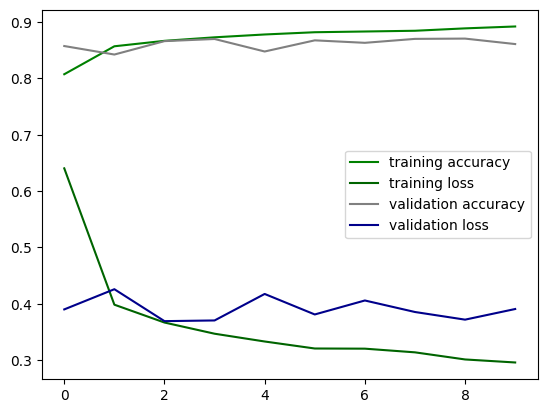

In [54]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)
log = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=batch_size,
    validation_data=(X_valid, y_valid),
)
create_plot(log)

### Exponential scheduling

We now use the `ExponentialDecay` schedule. Here, the computation is
```
current_learning_rate = initial_learning_rate * decay_rate**(step / decay_steps)
```
(Note that `**` means to the power of)

Our baseline exponential schedule has a `0.1` base, so we set `decay_rate=0.1`:

In [55]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01, decay_steps=s, decay_rate=0.1
)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)
log = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=batch_size,
    validation_data=(X_valid, y_valid),
)
create_plot(log)

NameError: name 's' is not defined

# 4. A lack of overfitting - increasing the capacity of the model

Epoch 1/20
  1/391 [..............................] - ETA: 1:56 - loss: 2.5290 - accuracy: 0.1250

2023-02-23 10:02:28.674930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 0.7262 - accuracy: 0.7583

2023-02-23 10:02:31.817100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 4s 9ms/step - loss: 0.7262 - accuracy: 0.7583 - val_loss: 0.5624 - val_accuracy: 0.8047
Epoch 2/20
391/391 [==============================] - 3s 7ms/step - loss: 0.5074 - accuracy: 0.8293 - val_loss: 0.5060 - val_accuracy: 0.8228
Epoch 3/20
391/391 [==============================] - 3s 8ms/step - loss: 0.4699 - accuracy: 0.8419 - val_loss: 0.4805 - val_accuracy: 0.8292
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 0.4504 - accuracy: 0.8480 - val_loss: 0.4663 - val_accuracy: 0.8397
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 0.4385 - accuracy: 0.8509 - val_loss: 0.4614 - val_accuracy: 0.8377
Epoch 6/20
391/391 [==============================] - 3s 7ms/step - loss: 0.4298 - accuracy: 0.8530 - val_loss: 0.4699 - val_accuracy: 0.8317
Epoch 7/20
391/391 [==============================] - 3s 7ms/step - loss: 0.4227 - accuracy: 0.8564 - val_loss: 0.4514 - val_accuracy: 0.8448
Epoch 8/20
391/39

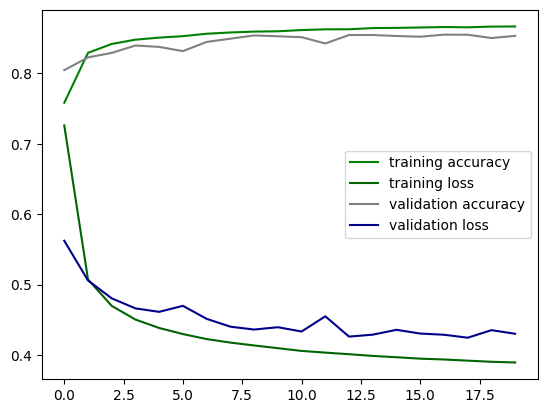

In [56]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)
log = model.fit(
    X_train, y_train, epochs=20, batch_size=128, validation_data=(X_valid, y_valid)
)
create_plot(log)

Epoch 1/20


2023-02-23 10:03:53.836903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 0.5841 - accuracy: 0.7925

2023-02-23 10:03:57.790014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 5s 10ms/step - loss: 0.5841 - accuracy: 0.7925 - val_loss: 0.5035 - val_accuracy: 0.8150
Epoch 2/20
391/391 [==============================] - 4s 9ms/step - loss: 0.4077 - accuracy: 0.8525 - val_loss: 0.4289 - val_accuracy: 0.8410
Epoch 3/20
391/391 [==============================] - 4s 9ms/step - loss: 0.3622 - accuracy: 0.8671 - val_loss: 0.3840 - val_accuracy: 0.8569
Epoch 4/20
391/391 [==============================] - 4s 9ms/step - loss: 0.3332 - accuracy: 0.8776 - val_loss: 0.3838 - val_accuracy: 0.8571
Epoch 5/20
391/391 [==============================] - 4s 9ms/step - loss: 0.3140 - accuracy: 0.8838 - val_loss: 0.3732 - val_accuracy: 0.8579
Epoch 6/20
391/391 [==============================] - 4s 9ms/step - loss: 0.2990 - accuracy: 0.8907 - val_loss: 0.3804 - val_accuracy: 0.8535
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 0.2845 - accuracy: 0.8936 - val_loss: 0.3401 - val_accuracy: 0.8753
Epoch 8/20
391/

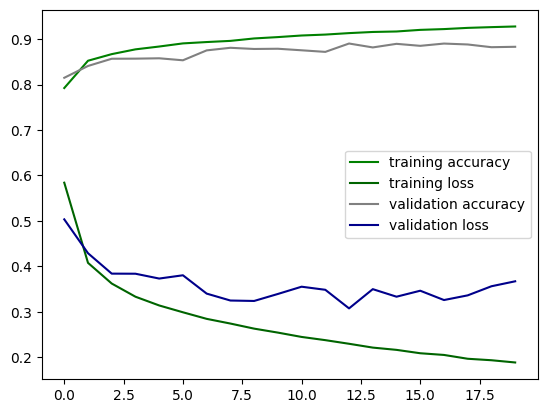

In [57]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)
log = model.fit(
    X_train, y_train, epochs=20, batch_size=128, validation_data=(X_valid, y_valid)
)
create_plot(log)

# 5. Reducing bias through hyperparameter tuning

One option to run HP tuning relies on TensorBoard and makes things quite visual. It's also relatively intuitive, but doesn't have as much functionality as the Keras Tuner, which we will see in the tutorial.

In [58]:
from tensorboard.plugins.hparams import api as hp


In [59]:
%load_ext tensorboard


The following command deletes the log folder and may be useful for cleaning up. But be careful not to delete the things you still want to keep:

In [60]:
rm - rf ./logs/


rm: -: No such file or directory
rm: rf: No such file or directory
rm: ./logs/: No such file or directory


We start by defining the parameters to tune over. We will tune the learning rate, the choice of optimizer, the dropout rate, and the number of hidden units per layer. We will stay fixed with two hidden layers, however.

Using HParams, we define the parameters, as well as the interval over which we may vary them:

In [61]:
HP_LEARNING_RATE = hp.HParam("learning_rate", hp.RealInterval(0.001, 1.0))
HP_OPTIMIZER = hp.HParam("optimizer", hp.Discrete(["adam", "rmsprop"]))
HP_DROPOUT = hp.HParam("dropout", hp.RealInterval(0.1, 0.3))
HP_NUM_UNITS = hp.HParam("num_units", hp.Discrete(range(50, 150)))

We also need to define the metrics to measure. We will only care about the accuracy in our case, since we are performing a classification on balanced data:

In [62]:
METRIC_ACCURACY = "accuracy"

Once we have set up our parameters and metrics, we write those into our folder with the logs:

In [63]:
with tf.summary.create_file_writer("logs/hparam_tuning").as_default():
    hp.hparams_config(
        hparams=[HP_LEARNING_RATE, HP_OPTIMIZER, HP_DROPOUT, HP_NUM_UNITS],
        metrics=[hp.Metric(METRIC_ACCURACY, display_name="Accuracy")],
    )

Next, we define a function that creates and trains a model, and evaluates it on the test set. This function will get a dictionary `hparams`, that contains the different parameter choices. Hence, the way the model is build is kept variable.

The function also logs the choice of parameters and the output of our function (the mse), in order to display both in TensorBoard. For this purpose, we give it the current directory where the relevant information should be kept, `run_dir`.

In [66]:
def train_test_model(hparams, run_dir):

    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Flatten(input_shape=[28, 28]),
            tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
            tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation="relu"),
            tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
            tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation="relu"),
            tf.keras.layers.Dense(10, activation="softmax"),
        ]
    )

    if hparams[HP_OPTIMIZER] == "rmsprop":
        optimizer = tf.keras.optimizers.RMSprop(
            learning_rate=hparams[HP_LEARNING_RATE]
        )
    elif hparams[HP_OPTIMIZER] == "adam":
        optimizer = tf.keras.optimizers.Adam(
            learning_rate=hparams[HP_LEARNING_RATE]
            )

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    model.fit(X_train, y_train, epochs=5)
    accuracy = model.evaluate(X_valid, y_valid)[1]

    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

Finally, we run a few different choices of parameters. Remember to choose parameters randomly! It is fine to sample the `dropout_rate`, `num_units` and `optimizer` at uniformly, but keep in mind the scaling issue when it comes to the `learning_rate`:

In [67]:
total_sessions = 3

for session in range(total_sessions):

    # Create hyperparameters randomly
    dropout_rate = HP_DROPOUT.domain.sample_uniform()
    num_units = HP_NUM_UNITS.domain.sample_uniform()
    optimizer = HP_OPTIMIZER.domain.sample_uniform()

    r = -3 * np.random.rand()
    learning_rate = 10.0**r

    # Create a dictionary of hyperparameters
    hparams = {
        HP_LEARNING_RATE: learning_rate,
        HP_OPTIMIZER: optimizer,
        HP_DROPOUT: dropout_rate,
        HP_NUM_UNITS: num_units,
    }

    # train the model with the chosen parameters
    run_name = "run-%d" % session
    print("--- Starting trial: %s" % run_name)
    print({h.name: hparams[h] for h in hparams})
    train_test_model(hparams, "logs/hparam_tuning/" + run_name)

--- Starting trial: run-0
{'learning_rate': 0.1656569108179011, 'optimizer': 'rmsprop', 'dropout': 0.1728127281958103, 'num_units': 108}
Epoch 1/5


2023-02-23 10:29:39.798286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 15s 9ms/step - loss: 14.7876 - accuracy: 0.0992
Epoch 2/5
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3265 - accuracy: 0.0992
Epoch 3/5
1563/1563 [==============================] - 14s 9ms/step - loss: 2.3260 - accuracy: 0.1005
Epoch 4/5
1563/1563 [==============================] - 15s 9ms/step - loss: 2.3263 - accuracy: 0.0978
Epoch 5/5
  5/313 [..............................] - ETA: 5s - loss: 2.3189 - accuracy: 0.1187 

2023-02-23 10:30:49.872479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 8ms/step - loss: 2.3228 - accuracy: 0.1024
--- Starting trial: run-1
{'learning_rate': 0.024483051110277515, 'optimizer': 'rmsprop', 'dropout': 0.2734000827387859, 'num_units': 148}
Epoch 1/5


2023-02-23 10:30:52.738241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 14s 9ms/step - loss: 1.3744 - accuracy: 0.6073
Epoch 2/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0619 - accuracy: 0.6388
Epoch 3/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0935 - accuracy: 0.6414
Epoch 4/5
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0561 - accuracy: 0.6448
Epoch 5/5
 14/313 [>.............................] - ETA: 2s - loss: 0.8076 - accuracy: 0.6763

2023-02-23 10:32:01.766328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.8821 - accuracy: 0.7142
--- Starting trial: run-2
{'learning_rate': 0.020070336720716307, 'optimizer': 'rmsprop', 'dropout': 0.2287472739514336, 'num_units': 92}
Epoch 1/5


2023-02-23 10:32:04.052016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 14s 9ms/step - loss: 1.0618 - accuracy: 0.6416
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9768 - accuracy: 0.6724
Epoch 3/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9799 - accuracy: 0.6826
Epoch 4/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0102 - accuracy: 0.6850
Epoch 5/5
 15/313 [>.............................] - ETA: 2s - loss: 0.7811 - accuracy: 0.6958

2023-02-23 10:33:10.892904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 1.0693 - accuracy: 0.7074


Finally, we display the runs using TensorBoard. If you are lucky, it is enough to call
```
%tensorboard --logdir logs
```
Otherwise, you might have to specify the path to the TensorBoard binary, such as here:

In [68]:
os.environ['TENSORBOARD_BINARY'] = '/Users/philippe/anaconda3/envs/adl_env/bin/tensorboard'
%tensorboard - -logdir logs


ERROR: Could not find
'/Users/philippe/anaconda3/envs/adl_env/bin/tensorboard' (set by the
`TENSORBOARD_BINARY` environment variable). Please ensure that your
PATH contains an executable `tensorboard` program, or explicitly
specify the path to a TensorBoard binary by setting the
`TENSORBOARD_BINARY` environment variable.

Once you have chosen a model that you like based on the hyperparameter search, how do you proceed?

# 6. Variance

## 6.1 Spurious correlations as a source of variance

We will see here that noise in your data makes your predictions worse - because it introduces spurious correlations that the model "learns" but that are actually without any meaning for generalization (i.e., that lead to more and more overfitting).

To show this, let's add additional features to the data. In one case, we will add features that are all zero, and in another case we will add features that are random. Note that we flatten the data first in this case, to make this process easier:

In [69]:
X_flat = X_other.reshape(X_other.shape[0], X_other.shape[1] ** 2)
X_with_noise = np.concatenate(
    [X_flat, np.random.random((X_flat.shape[0], X_flat.shape[1]))], axis=1
)
X_with_zero = np.concatenate(
    [X_flat, np.zeros((X_flat.shape[0], X_flat.shape[1]))], axis=1
)

Take a look at the shapes of our new data sets:

In [70]:
print(X_flat.shape)
print(X_with_noise.shape)
print(X_with_zero.shape)


(60000, 784)
(60000, 1568)
(60000, 1568)


We will now create the same model twice. Note that we no longer need a `Flatten` layer, because we already flattened the data. Also, we only applied our transformation once, to the `X_other` data. Hence, instead of resplitting our data, we will let `TensorFlow` do it for us, using `validation_split`.

In [71]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)
log_noise = model.fit(
    X_with_noise, y_other, epochs=5, batch_size=128, validation_split=0.2
)
log_zero = model.fit(
    X_with_zero, y_other, epochs=5, batch_size=128, validation_split=0.2
)

Epoch 1/5


2023-02-23 10:36:40.659419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


372/375 [============================>.] - ETA: 0s - loss: 0.7935 - accuracy: 0.7244

2023-02-23 10:36:45.409953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 5s 13ms/step - loss: 0.7913 - accuracy: 0.7251 - val_loss: 0.5087 - val_accuracy: 0.8144
Epoch 2/5
375/375 [==============================] - 3s 8ms/step - loss: 0.4843 - accuracy: 0.8187 - val_loss: 0.5367 - val_accuracy: 0.8058
Epoch 3/5
375/375 [==============================] - 3s 8ms/step - loss: 0.4149 - accuracy: 0.8444 - val_loss: 0.4217 - val_accuracy: 0.8431
Epoch 4/5
375/375 [==============================] - 4s 9ms/step - loss: 0.3720 - accuracy: 0.8607 - val_loss: 0.4102 - val_accuracy: 0.8499
Epoch 5/5
375/375 [==============================] - 3s 9ms/step - loss: 0.3374 - accuracy: 0.8718 - val_loss: 0.3739 - val_accuracy: 0.8662
Epoch 1/5
375/375 [==============================] - 3s 9ms/step - loss: 0.3406 - accuracy: 0.8765 - val_loss: 0.3667 - val_accuracy: 0.8698
Epoch 2/5
375/375 [==============================] - 4s 10ms/step - loss: 0.3083 - accuracy: 0.8860 - val_loss: 0.3401 - val_accuracy: 0.8809
Epoch 3/5
375/375 [==

Plot the results below. You will see that adding noise is always detrimental to the generalization ability of your model. The more noise, the worse!

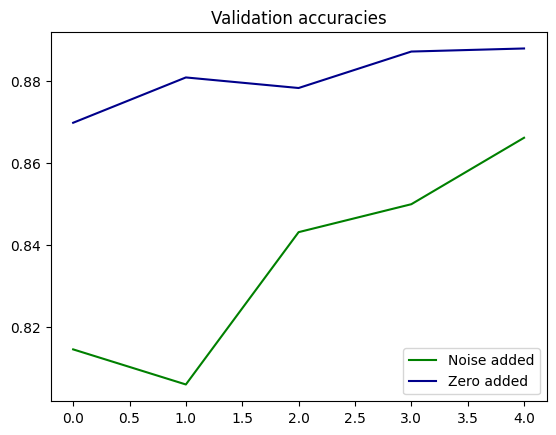

In [72]:
plt.plot(log_noise.history["val_accuracy"], label="Noise added", color="green")
plt.plot(log_zero.history["val_accuracy"], label="Zero added", color="darkblue")
plt.title("Validation accuracies")
plt.legend()
plt.show()

# 6.2 Lowering variance through regularization

We learned about a number of regularization techniques. Here, we will see how to implement early stopping, L2-regularization, and dropout-regularization

### Early stopping

When we implement early stopping, the model definition and compilation is unchanged:

In [73]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)

However, we now need to add a `callback` to the training process. We define the `EarlyStopping` callback, which interrupts training if the validation loss is no longer improving. In particular, the callback waits for `patience` epochs of no improvement before interrupting:

In [74]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=5, restore_best_weights=True
)

The other parameter here is `restore_best_weights`. If set to `True`, this simply means that, once the callback decides to interrupt, it takes the version of the model that led to the best validation loss so far (do you know which epoch this corresponds to?)

Epoch 1/50


2023-02-23 10:37:46.035053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 0.5785 - accuracy: 0.7963

2023-02-23 10:37:49.507539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 4s 9ms/step - loss: 0.5785 - accuracy: 0.7963 - val_loss: 0.5107 - val_accuracy: 0.8049
Epoch 2/50
391/391 [==============================] - 3s 8ms/step - loss: 0.3943 - accuracy: 0.8574 - val_loss: 0.4227 - val_accuracy: 0.8502
Epoch 3/50
391/391 [==============================] - 3s 9ms/step - loss: 0.3467 - accuracy: 0.8729 - val_loss: 0.3836 - val_accuracy: 0.8610
Epoch 4/50
391/391 [==============================] - 3s 8ms/step - loss: 0.3173 - accuracy: 0.8843 - val_loss: 0.3703 - val_accuracy: 0.8612
Epoch 5/50
391/391 [==============================] - 4s 9ms/step - loss: 0.2985 - accuracy: 0.8898 - val_loss: 0.3567 - val_accuracy: 0.8648
Epoch 6/50
391/391 [==============================] - 4s 9ms/step - loss: 0.2843 - accuracy: 0.8953 - val_loss: 0.3697 - val_accuracy: 0.8644
Epoch 7/50
391/391 [==============================] - 3s 9ms/step - loss: 0.2684 - accuracy: 0.9020 - val_loss: 0.3294 - val_accuracy: 0.8819
Epoch 8/50
391/39

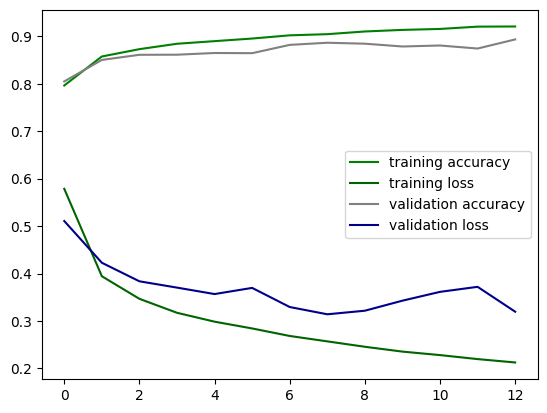

In [75]:
log = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb],
)
create_plot(log)

### L2- regularization

L2-regularization adds a penalty based on the L2-norm to the loss function. Usually, we add the same penalty for all weights, and we don't add a penalty for the biases. But you could also add a `bias_regularizer`, or even an `activity_regularizer`, which regularizes the output of the neurons instead of the parameters.

Keep in mind that the regularization parameter is another hyperparameter that might need tuning. A good starting point is 0.01, but it can vary quite a bit depending on the problem and network.

In [76]:
reg_param = 0.01
regularizer = tf.keras.regularizers.l2(reg_param)

Can you rerun the model from above, but using regularization? In particular, to each `Dense` layer, you want to add the argument `kernel_regularizer=regularizer`:

Epoch 1/10


2023-02-23 10:46:43.321361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 1.7258 - accuracy: 0.7468

2023-02-23 10:46:49.411176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 7s 17ms/step - loss: 1.7258 - accuracy: 0.7468 - val_loss: 0.9511 - val_accuracy: 0.7569
Epoch 2/10
391/391 [==============================] - 6s 16ms/step - loss: 0.9120 - accuracy: 0.7742 - val_loss: 0.8538 - val_accuracy: 0.8005
Epoch 3/10
391/391 [==============================] - 6s 16ms/step - loss: 0.8841 - accuracy: 0.7802 - val_loss: 0.9346 - val_accuracy: 0.7596
Epoch 4/10
391/391 [==============================] - 6s 16ms/step - loss: 0.8708 - accuracy: 0.7843 - val_loss: 1.0076 - val_accuracy: 0.7075
Epoch 5/10
391/391 [==============================] - 6s 16ms/step - loss: 0.8621 - accuracy: 0.7883 - val_loss: 0.8812 - val_accuracy: 0.7661
Epoch 6/10
391/391 [==============================] - 6s 16ms/step - loss: 0.8535 - accuracy: 0.7915 - val_loss: 0.8864 - val_accuracy: 0.7608
Epoch 7/10
391/391 [==============================] - 6s 16ms/step - loss: 0.8438 - accuracy: 0.7934 - val_loss: 0.8501 - val_accuracy: 0.7972
Epoch 8/10

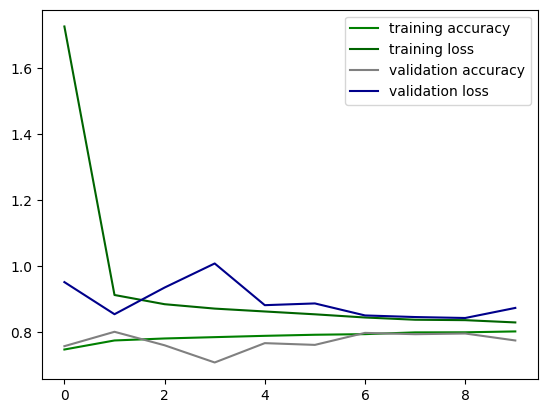

In [77]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(512, activation="relu", kernel_regularizer=regularizer),
        tf.keras.layers.Dense(10, activation="softmax", kernel_regularizer=regularizer),
    ]
)

model.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)
log = model.fit(
    X_train, y_train, epochs=10, batch_size=128, validation_data=(X_valid, y_valid)
)
create_plot(log)

As the regularization term is added when training but not when validating/testing, the loss will typically start out quite high, before the optimization routine finds a good way to adjust the weights to reduce the loss.

Note that we have improved the overfitting issue quite a bit, but unfortunately we have made it more difficult for the model to learn (we introduced bias). This is frequently the case, and we usually need to do some fiddling to find a good compromise.

### Dropout-regularization

Another regularization method is dropout-regularization. At training time, in each iteration, a number of neurons will be considered as non-existent, so we force the network to distribute weights more equally across neurons.

This makes the correct computation for activations a bit challenging when doing predictions, but luckily TensorFlow takes care of the added complexity.

If we want to ensure that neurons at a certain layer drop out (with probability `rate`), we add a `Dropout` layer before the corresponding `Dense` layer, using
```
tf.keras.layers.Dropout(rate=0.2)
```
Of course, `0.2` is just a particular choice and we can vary that.
Can you repeat the previous (baseline) model, but adding a `Dropout` layer before each `Dense` layer?